# Trabalho do Grau A - Ciência de Dados e Big Data.

1. Definições Iniciais

- Integrantes: João Accorsi e Rafael Klauck.
- Dataset: Alzheimer's Disease Dataset.
- Professor: Felipe de Morais.
- Grupo: 3.

# 2. Modelagem

2.1 Dataset Escolhido 

O presente trabalho consta com a implementação de um modelo de Machile Learning, a partir do Dataset 'Alzheimer's Disease Dataset'. A base de dados possui informações de 2149 pacientes, com características que podem influenciar no diagnóstico do Alzheimer, como fatores cotidianos (fumante, IMC, frquência com que prática de atividade física etc), histórico médico (familiares com alzheimer, diabetes etc), médidas clínicas (nível colesterol/triglicerídeos etc), aptdão cognitiva (teste de memória, exame mental etc), sintomas (confusão, desorientação, nível de esquecimento etc); e por fim, o diagnóstico de possuir ou não Alzheimer. Desta forma, o objetivo da construção do algoritmo de Machine Learning é identificar quais características são mais relevantes, e levam ao paciente a desenvolver Alzhaimer, treinando assim um modelo, o qual será capaz de classificar um novo paciete com tendência ou não a desenvolver Alzhaimer.

A base de dados pode ser encontrado no Kaggle https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

# 3. Implementação

3.1 Importações

Inicialmente, a importação de bibliotecas necessárias é feita.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,f1_score

Em seguida, o download do dataset direto do Kaggle, e a sua vizualisação.

In [5]:
alzheimers_data = pd.read_csv('alzheimers_disease_data.csv')
alzheimers_data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


3.2 Pré Processamento dos Dados

In [4]:
# Check for missing values
alzheimers_data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [5]:
# checking inconsistencies data

# Gender
print(alzheimers_data[alzheimers_data['Gender'] > 1])
print(alzheimers_data[alzheimers_data['Gender'] < 0])

# Age
print(alzheimers_data[alzheimers_data['Age'] > 90])
print(alzheimers_data[alzheimers_data['Age'] < 60])

# Ethnicity
print(alzheimers_data[alzheimers_data['Ethnicity'] < 0])
print(alzheimers_data[alzheimers_data['Ethnicity'] > 3])

# EducationLevel
print(alzheimers_data[alzheimers_data['EducationLevel'] < 0])
print(alzheimers_data[alzheimers_data['EducationLevel'] > 3])

# BMI
print(alzheimers_data[alzheimers_data['BMI'] < 15])
print(alzheimers_data[alzheimers_data['BMI'] > 40])

# Smoking
print(alzheimers_data[alzheimers_data['Smoking'] < 0])
print(alzheimers_data[alzheimers_data['Smoking'] > 1])

# AlcoholConsumption
print(alzheimers_data[alzheimers_data['AlcoholConsumption'] < 0])
print(alzheimers_data[alzheimers_data['AlcoholConsumption'] > 20])

# PhysicalActivity
print(alzheimers_data[alzheimers_data['PhysicalActivity'] < 0])
print(alzheimers_data[alzheimers_data['PhysicalActivity'] > 10])

# DietQuality
print(alzheimers_data[alzheimers_data['DietQuality'] < 0])
print(alzheimers_data[alzheimers_data['DietQuality'] > 10])

# SleepQuality
print(alzheimers_data[alzheimers_data['SleepQuality'] < 4])
print(alzheimers_data[alzheimers_data['SleepQuality'] > 10])

# FamilyHistoryAlzheimers
print(alzheimers_data[alzheimers_data['FamilyHistoryAlzheimers'] < 0])
print(alzheimers_data[alzheimers_data['FamilyHistoryAlzheimers'] > 1])

# CardiovascularDisease
print(alzheimers_data[alzheimers_data['CardiovascularDisease'] < 0])
print(alzheimers_data[alzheimers_data['CardiovascularDisease'] > 1])

# Diabetes
print(alzheimers_data[alzheimers_data['Diabetes'] < 0])
print(alzheimers_data[alzheimers_data['Diabetes'] > 1])

# Depression
print(alzheimers_data[alzheimers_data['Depression'] < 0])
print(alzheimers_data[alzheimers_data['Depression'] > 1])

# HeadInjury
print(alzheimers_data[alzheimers_data['HeadInjury'] < 0])
print(alzheimers_data[alzheimers_data['HeadInjury'] > 1])

# Hypertension
print(alzheimers_data[alzheimers_data['Hypertension'] < 0])
print(alzheimers_data[alzheimers_data['Hypertension'] > 1])

# SystolicBP
print(alzheimers_data[alzheimers_data['SystolicBP'] < 90])
print(alzheimers_data[alzheimers_data['SystolicBP'] > 180])

# DiastolicBP
print(alzheimers_data[alzheimers_data['DiastolicBP'] < 60])
print(alzheimers_data[alzheimers_data['DiastolicBP'] > 120])

# CholesterolTotal
print(alzheimers_data[alzheimers_data['CholesterolTotal'] < 150])
print(alzheimers_data[alzheimers_data['CholesterolTotal'] > 300])

# CholesterolLDL
print(alzheimers_data[alzheimers_data['CholesterolLDL'] < 50])
print(alzheimers_data[alzheimers_data['CholesterolLDL'] > 200])

# CholesterolHDL
print(alzheimers_data[alzheimers_data['CholesterolHDL'] < 20])
print(alzheimers_data[alzheimers_data['CholesterolHDL'] > 100])

# CholesterolTriglycerides
print(alzheimers_data[alzheimers_data['CholesterolTriglycerides'] < 50])
print(alzheimers_data[alzheimers_data['CholesterolTriglycerides'] > 400])

# MMSE
print(alzheimers_data[alzheimers_data['MMSE'] < 0])
print(alzheimers_data[alzheimers_data['MMSE'] > 30])

# FunctionalAssessment 
print(alzheimers_data[alzheimers_data['FunctionalAssessment'] < 0])
print(alzheimers_data[alzheimers_data['FunctionalAssessment'] > 10])

# MemoryComplaints
print(alzheimers_data[alzheimers_data['MemoryComplaints'] < 0])
print(alzheimers_data[alzheimers_data['MemoryComplaints'] > 1])

# BehavioralProblems
print(alzheimers_data[alzheimers_data['BehavioralProblems'] < 0])
print(alzheimers_data[alzheimers_data['BehavioralProblems'] > 1])

# ADL
print(alzheimers_data[alzheimers_data['ADL'] < 0])
print(alzheimers_data[alzheimers_data['ADL'] > 10])

# Confusion
print(alzheimers_data[alzheimers_data['Confusion'] < 0])
print(alzheimers_data[alzheimers_data['Confusion'] > 1])

# Disorientation
print(alzheimers_data[alzheimers_data['Disorientation'] < 0])
print(alzheimers_data[alzheimers_data['Disorientation'] > 1])

# PersonalityChanges
print(alzheimers_data[alzheimers_data['PersonalityChanges'] < 0])
print(alzheimers_data[alzheimers_data['PersonalityChanges'] > 1])

# DifficultyCompletingTasks
print(alzheimers_data[alzheimers_data['DifficultyCompletingTasks'] < 0])
print(alzheimers_data[alzheimers_data['DifficultyCompletingTasks'] > 1])

# Forgetfulness
print(alzheimers_data[alzheimers_data['Forgetfulness'] < 0])
print(alzheimers_data[alzheimers_data['Forgetfulness'] > 1])

# Diagnosis
print(alzheimers_data[alzheimers_data['Diagnosis'] < 0])
print(alzheimers_data[alzheimers_data['Diagnosis'] > 1])


Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness, Diagnosis, DoctorInCharge]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Con

Verificando os prints acima, é possível ver que não há dados inconsistentes. Os valores que são esperados (que estão na documentação no Kaggle) estão presentes e não há valores faltantes.

**Pontos Importantes:**
- MMSE, FunctionalAssessment e ADL: quanto maior o valor, melhor - "Lower scores indicate greater impairment"

In [6]:
alzheimers_data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


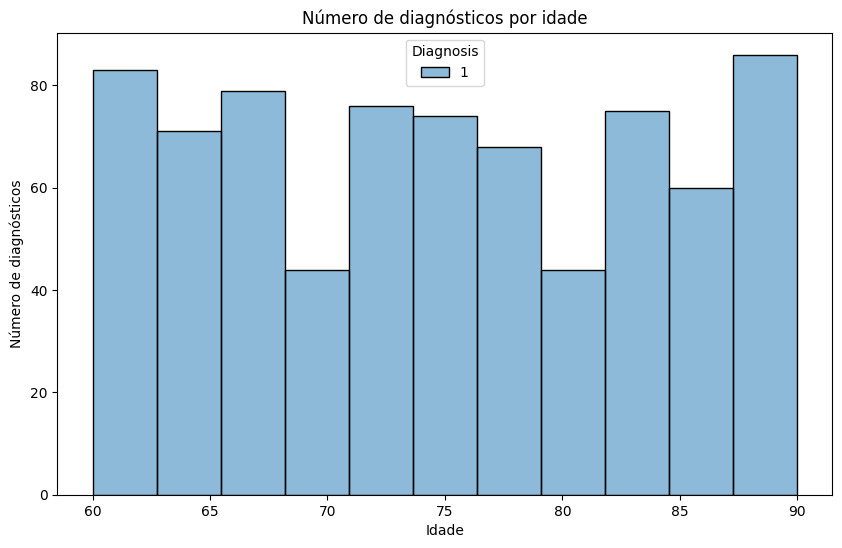

In [7]:
# Grafico número de diagnósticos por idade

filtered_alzheimers_data = alzheimers_data[alzheimers_data['Diagnosis'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_alzheimers_data, x='Age', hue='Diagnosis')
plt.title('Número de diagnósticos por idade')
plt.xlabel('Idade')
plt.ylabel('Número de diagnósticos')
plt.show()


**Descrição dados diagnósticos positivos**

In [8]:
pd.set_option('display.max_columns', None) # necessário para visualizar todas as colunas
positive_diagnosis = alzheimers_data[alzheimers_data['Diagnosis'] == 1]
positive_diagnosis.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.0
mean,5859.401316,74.842105,0.492105,0.677632,1.232895,27.912670,0.285526,9.980156,4.943160,5.026581,6.916292,0.232895,0.159211,0.135526,0.197368,0.084211,0.165789,133.717105,89.973684,225.565197,122.461726,60.795330,231.406671,11.994657,3.653380,0.376316,0.267105,3.657938,0.194737,0.146053,0.140789,0.163158,0.301316,1.0
std,632.399817,9.149977,0.500267,0.984745,0.902184,7.298765,0.451962,5.769338,2.836046,2.911135,1.755597,0.422954,0.366113,0.342510,0.398275,0.277886,0.372136,25.962885,17.458231,43.192207,43.231730,23.236805,102.115973,7.225532,2.566685,0.484780,0.442739,2.700909,0.396259,0.353392,0.348033,0.369753,0.459132,0.0
min,4758.000000,60.000000,0.000000,0.000000,0.000000,15.018240,0.000000,0.065286,0.019957,0.019940,4.006171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.212650,50.430083,20.015125,50.461611,0.050624,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5326.750000,67.000000,0.000000,0.000000,1.000000,21.684882,0.000000,4.802623,2.632883,2.596171,5.340061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,188.747243,85.195865,39.687037,140.034382,6.040483,1.576868,0.000000,0.000000,1.425180,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,5858.500000,75.000000,0.000000,0.000000,1.000000,28.004793,0.000000,9.860342,4.845318,5.082541,6.912164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,226.448082,121.803389,61.847228,239.618889,11.565835,3.299060,0.000000,0.000000,3.235750,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,6405.500000,83.000000,1.000000,1.000000,2.000000,34.449386,1.000000,15.190361,7.374699,7.577309,8.411609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.000000,105.000000,262.805195,160.046948,80.565846,316.131860,18.151993,4.920710,1.000000,1.000000,5.026479,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,6898.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.988291,9.985069,9.971204,9.997627,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.959991,199.965665,99.959494,399.854322,29.959425,9.927945,1.000000,1.000000,9.945036,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


**Descrição dados diagnósticos negativos**

In [9]:
pd.set_option('display.max_columns', None) # necessário para visualizar todas as colunas
negative_diagnosis = alzheimers_data[alzheimers_data['Diagnosis'] == 0]
negative_diagnosis.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.0
mean,5806.177106,74.945284,0.514039,0.708423,1.316055,27.515092,0.290137,10.071880,4.907640,4.974839,7.124832,0.262779,0.136069,0.159107,0.202304,0.097192,0.139669,134.564435,89.778978,224.996342,125.361434,58.734832,226.571537,16.265543,5.860669,0.115911,0.096472,5.707951,0.210943,0.164867,0.156228,0.156228,0.301656,0.0
std,613.315616,8.904709,0.499983,1.002487,0.904779,7.171293,0.453989,5.753469,2.869635,2.908802,1.764196,0.440302,0.342985,0.365908,0.401862,0.296326,0.346768,25.946402,17.671415,42.196668,43.421489,23.061410,101.912145,8.933233,2.761000,0.320233,0.295344,2.826502,0.408125,0.371194,0.363202,0.363202,0.459142,0.0
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.011898,0.000000,0.000000,0.014691,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5280.000000,67.000000,0.000000,0.000000,1.000000,21.538994,0.000000,5.310439,2.524451,2.354424,5.564564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,75.000000,191.512224,87.947655,38.675117,137.172234,8.545490,3.850641,0.000000,0.000000,3.402695,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5801.000000,75.000000,1.000000,0.000000,1.000000,27.560758,0.000000,9.967224,4.733116,5.066293,7.238501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,90.000000,224.453889,124.839495,58.299539,226.136002,17.145797,6.244300,0.000000,0.000000,6.135120,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,6340.000000,83.000000,1.000000,1.000000,2.000000,33.590817,1.000000,15.095018,7.455434,7.519704,8.645183,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,261.873127,162.663527,77.917938,313.244803,24.595710,8.121256,0.000000,0.000000,7.998984,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.988513,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.807179,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


**Pontos importantes analisados:**
- FamilyHistoryAlzheimers: em média, ambos estão próximos de 0,2... 
- MMSE: quem teve diagnóstico positivo, em média tem MMSE mais baixo
- Confusion: quem teve diagnóstico positivo, em média tem confusão mais baixa
- Disiorientation: quem teve diagnóstico positivo, em média tem desorientação mais baixa
- PersonalityChange: quem teve diagnóstico positivo, em média tem mudança de personalidade mais baixa
- DifficultyCompletingTasks: os resultados das médias são bem próximos, mas quem teve diagnóstico positivo, em média tem dificuldade para completar tarefas mais alta
- Forgetfulness: resultados das médias são bem próximos.

Em geral, as médias são próximos. Só no MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems e ADL temos as médias mais distantes. Isso pode ser um indicativo de que essas variáveis são mais importantes para o diagnóstico.

In [10]:
graph = px.scatter_matrix(alzheimers_data, dimensions=['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL'], color='Diagnosis')
graph.show()

In [11]:
# vendo quantos porcentos de pessoas com e sem diagnóstico de Alzheimer tem MMSE acima e abaixo da média
# lembrando que MMSE quanto mais baixo, pior é o diagnóstico
mean_MMSE = alzheimers_data['MMSE'].mean()

positive_diagnosis_MMSE_above_mean = positive_diagnosis[positive_diagnosis['MMSE'] > mean_MMSE]
positive_diagnosis_MMSE_below_mean = positive_diagnosis[positive_diagnosis['MMSE'] < mean_MMSE]

positive_diagnosis_MMSE_above_mean_percentage = (positive_diagnosis_MMSE_above_mean.shape[0] / positive_diagnosis.shape[0]) * 100
positive_diagnosis_MMSE_below_mean_percentage = (positive_diagnosis_MMSE_below_mean.shape[0] / positive_diagnosis.shape[0]) * 100

negative_diagnosis_MMSE_above_mean = negative_diagnosis[negative_diagnosis['MMSE'] > mean_MMSE]
negative_diagnosis_MMSE_below_mean = negative_diagnosis[negative_diagnosis['MMSE'] < mean_MMSE]

negative_diagnosis_MMSE_above_mean_percentage = (negative_diagnosis_MMSE_above_mean.shape[0] / negative_diagnosis.shape[0]) * 100
negative_diagnosis_MMSE_below_mean_percentage = (negative_diagnosis_MMSE_below_mean.shape[0] / negative_diagnosis.shape[0]) * 100

print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com teste MMSE acima da média: {positive_diagnosis_MMSE_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com teste MMSE abaixo da média: {positive_diagnosis_MMSE_below_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com teste MMSE acima da média: {negative_diagnosis_MMSE_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com teste MMSE abaixo da média: {negative_diagnosis_MMSE_below_mean_percentage:.2f}%')

Porcentagem de pessoas COM diagnóstico de Alzheimer com teste MMSE acima da média: 35.66%
Porcentagem de pessoas COM diagnóstico de Alzheimer com teste MMSE abaixo da média: 64.34%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com teste MMSE acima da média: 55.87%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com teste MMSE abaixo da média: 44.13%


In [12]:
# vendo quantos porcentos de pessoas com e sem diagnóstico de Alzheimer tem FunctionalAssessment acima e abaixo da média
mean_FunctionalAssessment = alzheimers_data['FunctionalAssessment'].mean()

positive_diagnosis_FunctionalAssessment_above_mean = positive_diagnosis[positive_diagnosis['FunctionalAssessment'] > mean_FunctionalAssessment]
positive_diagnosis_FunctionalAssessment_below_mean = positive_diagnosis[positive_diagnosis['FunctionalAssessment'] < mean_FunctionalAssessment]

positive_diagnosis_FunctionalAssessment_above_mean_percentage = (positive_diagnosis_FunctionalAssessment_above_mean.shape[0] / positive_diagnosis.shape[0]) * 100
positive_diagnosis_FunctionalAssessment_below_mean_percentage = (positive_diagnosis_FunctionalAssessment_below_mean.shape[0] / positive_diagnosis.shape[0]) * 100

negative_diagnosis_FunctionalAssessment_above_mean = negative_diagnosis[negative_diagnosis['FunctionalAssessment'] > mean_FunctionalAssessment]
negative_diagnosis_FunctionalAssessment_below_mean = negative_diagnosis[negative_diagnosis['FunctionalAssessment'] < mean_FunctionalAssessment]

negative_diagnosis_FunctionalAssessment_above_mean_percentage = (negative_diagnosis_FunctionalAssessment_above_mean.shape[0] / negative_diagnosis.shape[0]) * 100
negative_diagnosis_FunctionalAssessment_below_mean_percentage = (negative_diagnosis_FunctionalAssessment_below_mean.shape[0] / negative_diagnosis.shape[0]) * 100

print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com FunctionalAssessment acima da média: {positive_diagnosis_FunctionalAssessment_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com FunctionalAssessment abaixo da média: {positive_diagnosis_FunctionalAssessment_below_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com FunctionalAssessment acima da média: {negative_diagnosis_FunctionalAssessment_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com FunctionalAssessment abaixo da média: {negative_diagnosis_FunctionalAssessment_below_mean_percentage:.2f}%')

Porcentagem de pessoas COM diagnóstico de Alzheimer com FunctionalAssessment acima da média: 22.89%
Porcentagem de pessoas COM diagnóstico de Alzheimer com FunctionalAssessment abaixo da média: 77.11%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com FunctionalAssessment acima da média: 65.15%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com FunctionalAssessment abaixo da média: 34.85%


In [13]:
# vendo quantos porcentos de pessoas com e sem diagnóstico de Alzheimer tem ADL acima e abaixo da média

mean_ADL = alzheimers_data['ADL'].mean()

positive_diagnosis_ADL_above_mean = positive_diagnosis[positive_diagnosis['ADL'] > mean_ADL]
positive_diagnosis_ADL_below_mean = positive_diagnosis[positive_diagnosis['ADL'] < mean_ADL]

positive_diagnosis_ADL_above_mean_percentage = (positive_diagnosis_ADL_above_mean.shape[0] / positive_diagnosis.shape[0]) * 100
positive_diagnosis_ADL_below_mean_percentage = (positive_diagnosis_ADL_below_mean.shape[0] / positive_diagnosis.shape[0]) * 100

negative_diagnosis_ADL_above_mean = negative_diagnosis[negative_diagnosis['ADL'] > mean_ADL]
negative_diagnosis_ADL_below_mean = negative_diagnosis[negative_diagnosis['ADL'] < mean_ADL]

negative_diagnosis_ADL_above_mean_percentage = (negative_diagnosis_ADL_above_mean.shape[0] / negative_diagnosis.shape[0]) * 100
negative_diagnosis_ADL_below_mean_percentage = (negative_diagnosis_ADL_below_mean.shape[0] / negative_diagnosis.shape[0]) * 100

print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com ADL acima da média: {positive_diagnosis_ADL_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas COM diagnóstico de Alzheimer com ADL abaixo da média: {positive_diagnosis_ADL_below_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com ADL acima da média: {negative_diagnosis_ADL_above_mean_percentage:.2f}%')
print(f'Porcentagem de pessoas SEM diagnóstico de Alzheimer com ADL abaixo da média: {negative_diagnosis_ADL_below_mean_percentage:.2f}%')

Porcentagem de pessoas COM diagnóstico de Alzheimer com ADL acima da média: 25.66%
Porcentagem de pessoas COM diagnóstico de Alzheimer com ADL abaixo da média: 74.34%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com ADL acima da média: 64.43%
Porcentagem de pessoas SEM diagnóstico de Alzheimer com ADL abaixo da média: 35.57%


In [14]:
# Separando previsores e classe
X = alzheimers_data[['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']]
y = alzheimers_data['Diagnosis']

# Dividindo o dataset em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
models = {
  "Logistic Regression": LogisticRegression(),
  "Random Forest": RandomForestClassifier(),
  "Decision Tree": DecisionTreeClassifier(),
}

results = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results[model_name] = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1
  }

for name, metrics in results.items():
  print(f"Model: {name}")
  print(f"Accuracy: {metrics['accuracy']:.2f}")
  print(f"Precision: {metrics['precision']:.2f}")
  print(f"Recall: {metrics['recall']:.2f}")
  print(f"F1: {metrics['f1']:.2f}")
  print("-" * 40)

Model: Logistic Regression
Accuracy: 0.83
Precision: 0.80
Recall: 0.72
F1: 0.76
----------------------------------------
Model: Random Forest
Accuracy: 0.95
Precision: 0.96
Recall: 0.90
F1: 0.93
----------------------------------------
Model: Decision Tree
Accuracy: 0.90
Precision: 0.85
Recall: 0.86
F1: 0.85
----------------------------------------
